In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## Reding the csv file 
baseball = pd.read_csv('Dataset_6_1.csv')
baseball.head()

,Team,Year,Runs,T,HR,SB,OPS
0,Texas Rangers,2011,855,32,210,143,0.800
1,Boston Red Sox,2011,875,35,203,102,0.810
2,Detroit Tigers,2011,787,34,169,49,0.773
3,Kansas City Royals,2011,730,41,129,153,0.744
4,St. Louis Cardinals,2011,762,22,162,57,0.766


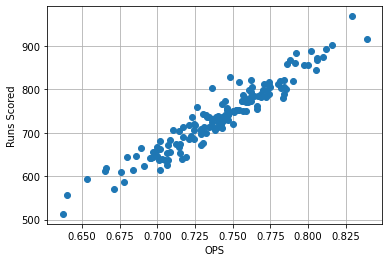

In [3]:
## Plotting runs vs ops
plt.plot('OPS', 'Runs', 'o', data = baseball)
plt.xlabel('OPS')
plt.ylabel('Runs Scored')
plt.grid()
# plt.savefig('chapter6_plot1.pdf')
plt.show()

# Linear Regression

In [6]:
## Fitting the linear model
lm_md = smf.ols(formula = 'Runs ~ OPS', data = baseball).fit()

## Extracting model results
lm_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Runs   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1641.
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           5.49e-82
Time:                        18:51:45   Log-Likelihood:                -681.48
No. Observations:                 150   AIC:                             1367.
Df Residuals:                     148   BIC:                             1373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -764.6958     37.099    -20.612      0.000    -838.008    -691.384
OPS         2025.8635     50.009     40.510      0.000    1927.040    2124.687
==============================================================================
Omnibus:                       12.632   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.824
Skew:                           0.615   Prob(JB):                     0.000996
Kurtosis:                       3.836   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Polynomial Regression

In [2]:
## Reading the csv file 
ken = pd.read_csv('Dataset_6_4.csv')
ken.head()

,Year,HR,T
0,1989,3.516484,1
1,1990,3.685092,2
2,1991,4.014599,3
3,1992,4.778761,4
4,1993,7.731959,5


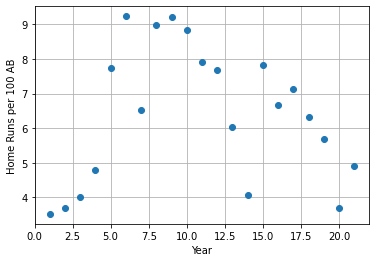

In [4]:
## Visualizing Ken Griffer Jr home run data
plt.plot('T', 'HR', 'o', data = ken)
plt.xlabel('Year')
plt.ylabel('Home Runs per 100 AB')
plt.grid()
# plt.savefig('chapter6_plot2.pdf')
plt.show()

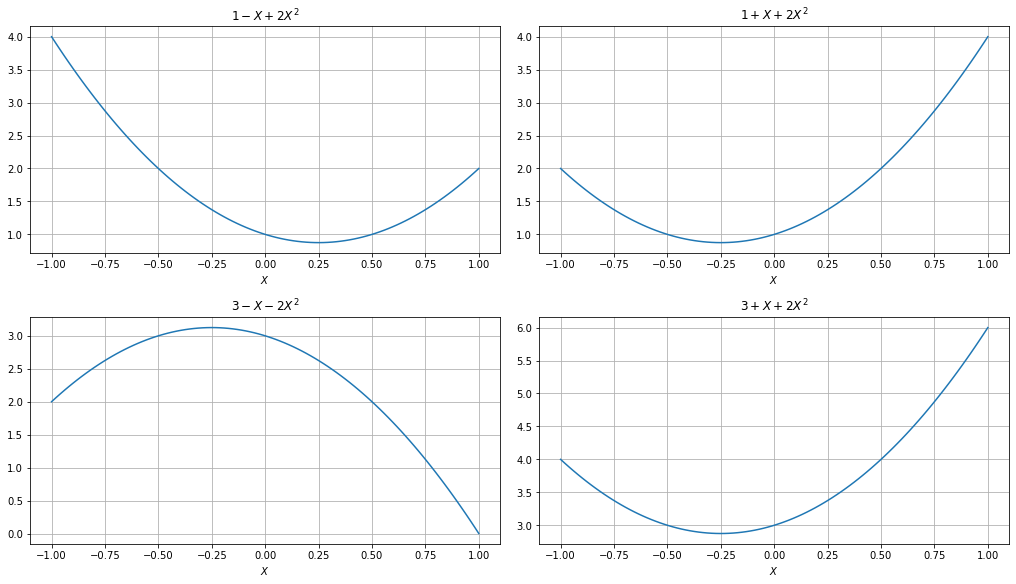

In [13]:
x = np.linspace(-1, 1, num = 100)
y1 = 1 - x + 2*x**2
y2 = 1 + x + 2*x**2
y3 = 3 - x - 2*x**2
y4 = 3 + x + 2*x**2

## Creating a new figure
fig, axes = plt.subplots(2, 2, figsize = (14, 8), constrained_layout=True)

## Plotting the first parabola
axes[0, 0].plot(x, y1)
axes[0, 0].set_xlabel(r'$X$')
axes[0, 0].set_title(r'$1 - X + 2X^2$')
axes[0, 0].grid()

## Plotting the second parabola
axes[0, 1].plot(x, y2)
axes[0, 1].set_xlabel(r'$X$')
axes[0, 1].set_title(r'$1 + X + 2X^2$')
axes[0, 1].grid()

## Plotting the third parabola
axes[1, 0].plot(x, y3)
axes[1, 0].set_xlabel(r'$X$')
axes[1, 0].set_title(r'$3 - X - 2X^2$')
axes[1, 0].grid()

## Plotting the fourth parabola
axes[1, 1].plot(x, y4)
axes[1, 1].set_xlabel(r'$X$')
axes[1, 1].set_title(r'$3 + X + 2X^2$')
axes[1, 1].grid()

# plt.savefig('chapter6_plot3.pdf')